# Applied Mathematics for Complex Systems Modeling
## Chapter 1: Introduction to Complex Systems Theory
### Section 1.1: The Nature of Complexity - Exercises

This notebook contains exercises exploring the fundamental nature of complexity in systems. We'll work through examples that demonstrate key characteristics of complex systems and implement simple models to visualize complexity.

## Setup

Let's start by importing the libraries we'll need for our exercises.

In [1]:
!pip install networkx 
!pip install ipython


[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: C:\Users\kekoi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: C:\Users\kekoi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp
import networkx as nx
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')

# For reproducibility
np.random.seed(42)

## Exercise 1: Quantifying Complexity through Entropy (Solved Example)

One way to quantify complexity is through information entropy, which measures the uncertainty or randomness in a system. Shannon entropy is defined as:

$$H(X) = -\sum_{i=1}^{n} p(x_i) \log_2 p(x_i)$$

where $p(x_i)$ is the probability of event $x_i$ occurring.

In this exercise, we'll explore how entropy changes as a system transitions between order and chaos, which is a key aspect of complex systems.

Entropy of ordered system: -0.0000 bits
Entropy of mixed system: 1.0000 bits
Entropy of random system: 0.9896 bits


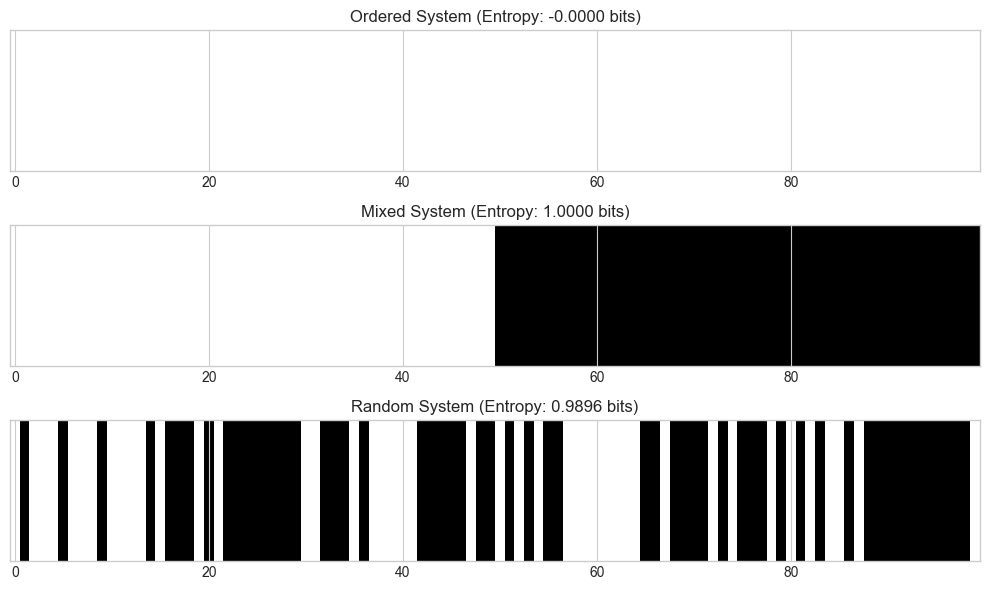

In [3]:
def calculate_entropy(array):
    """Calculate Shannon entropy of a 1D array."""
    # Get frequency of each unique value
    values, counts = np.unique(array, return_counts=True)
    # Convert to probabilities
    probabilities = counts / len(array)
    # Calculate entropy
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Create three different arrays representing different levels of order/disorder
ordered = np.zeros(100)  # Completely ordered (all elements are the same)
mixed = np.concatenate([np.zeros(50), np.ones(50)])  # Mixed but structured
random = np.random.randint(0, 2, 100)  # Random binary array

# Calculate entropy for each array
entropy_ordered = calculate_entropy(ordered)
entropy_mixed = calculate_entropy(mixed)
entropy_random = calculate_entropy(random)

# Display results
print(f"Entropy of ordered system: {entropy_ordered:.4f} bits")
print(f"Entropy of mixed system: {entropy_mixed:.4f} bits")
print(f"Entropy of random system: {entropy_random:.4f} bits")

# Visualize the three systems
fig, axes = plt.subplots(3, 1, figsize=(10, 6))

axes[0].imshow([ordered], aspect='auto', cmap='binary')
axes[0].set_title(f"Ordered System (Entropy: {entropy_ordered:.4f} bits)")
axes[0].set_yticks([])

axes[1].imshow([mixed], aspect='auto', cmap='binary')
axes[1].set_title(f"Mixed System (Entropy: {entropy_mixed:.4f} bits)")
axes[1].set_yticks([])

axes[2].imshow([random], aspect='auto', cmap='binary')
axes[2].set_title(f"Random System (Entropy: {entropy_random:.4f} bits)")
axes[2].set_yticks([])

plt.tight_layout()
plt.show()

### Explanation

In this example, we've quantified complexity using Shannon entropy for three different systems:

1. **Ordered System**: All elements are identical (all zeros), resulting in zero entropy. This system is completely predictable and has no complexity.

2. **Mixed System**: Half zeros and half ones, arranged in a structured pattern. This system has some entropy (1 bit), indicating moderate complexity or information content.

3. **Random System**: Randomly distributed zeros and ones. This system has entropy close to 1 bit (the maximum for a binary system), indicating maximum uncertainty.

This demonstrates an important principle in complex systems: true complexity often lies between complete order and complete randomness. Many complex systems exhibit this "edge of chaos" behavior where they have enough structure to maintain organization but enough randomness to adapt and evolve.

## Exercise 2: Complexity in Logistic Map

One of the simplest mathematical models that can exhibit complex behavior is the logistic map, a discrete-time demographic model given by:

$$x_{n+1} = r \cdot x_n \cdot (1 - x_n)$$

where $x_n$ is a number between 0 and 1 representing the population at time $n$, and $r$ is a parameter representing the growth rate.

Let's explore how the behavior of this simple system changes as we vary the parameter $r$.

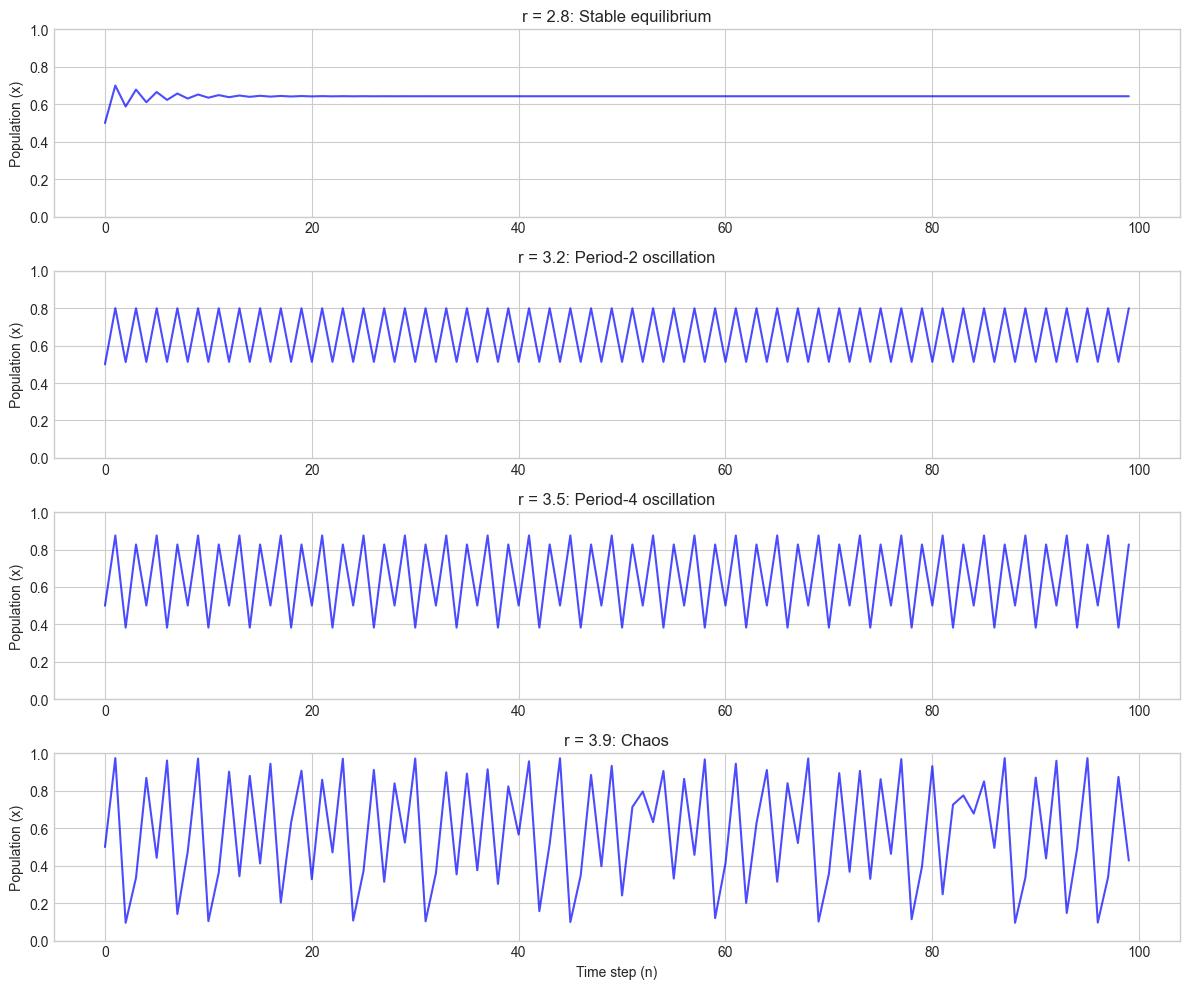

In [11]:
def logistic_map(x, r):
    """Calculate the next value in the logistic map."""
    return r * x * (1 - x)

def generate_logistic_sequence(x0, r, n):
    """Generate a sequence of n values from the logistic map."""
    sequence = np.zeros(n)
    sequence[0] = x0
    for i in range(1, n):
        sequence[i] = logistic_map(sequence[i-1], r)
    return sequence

# Generate sequences with different r values
x0 = 0.5  # Initial value
n = 100   # Number of iterations

r_values = [2.8, 3.2, 3.5, 3.9]  # Different growth rates
labels = ["Stable equilibrium", "Period-2 oscillation", "Period-4 oscillation", "Chaos"]

# Plot the time series for each r value
fig, axes = plt.subplots(len(r_values), 1, figsize=(12, 10))

for i, (r, label) in enumerate(zip(r_values, labels)):
    sequence = generate_logistic_sequence(x0, r, n)
    axes[i].plot(sequence, 'b-', alpha=0.7)
    axes[i].set_title(f"r = {r}: {label}")
    axes[i].set_ylim(0, 1)
    axes[i].set_ylabel("Population (x)")
    
axes[-1].set_xlabel("Time step (n)")
plt.tight_layout()
plt.show()

### Your Turn: Bifurcation Diagram

Now, let's create a bifurcation diagram for the logistic map, which will show the long-term behavior of the system for different values of the parameter $r$. This is a classic visualization in complexity science that reveals the transition from order to chaos.

**Tasks:**
1. Complete the function to generate the data for a bifurcation diagram
2. Plot the bifurcation diagram for $r$ values between 2.5 and 4.0
3. Analyze the diagram and identify:
   - Regions of stable behavior (single fixed point)
   - Regions of periodic behavior (oscillations)
   - Regions of chaotic behavior
   - Values of $r$ where bifurcations (period-doubling) occur

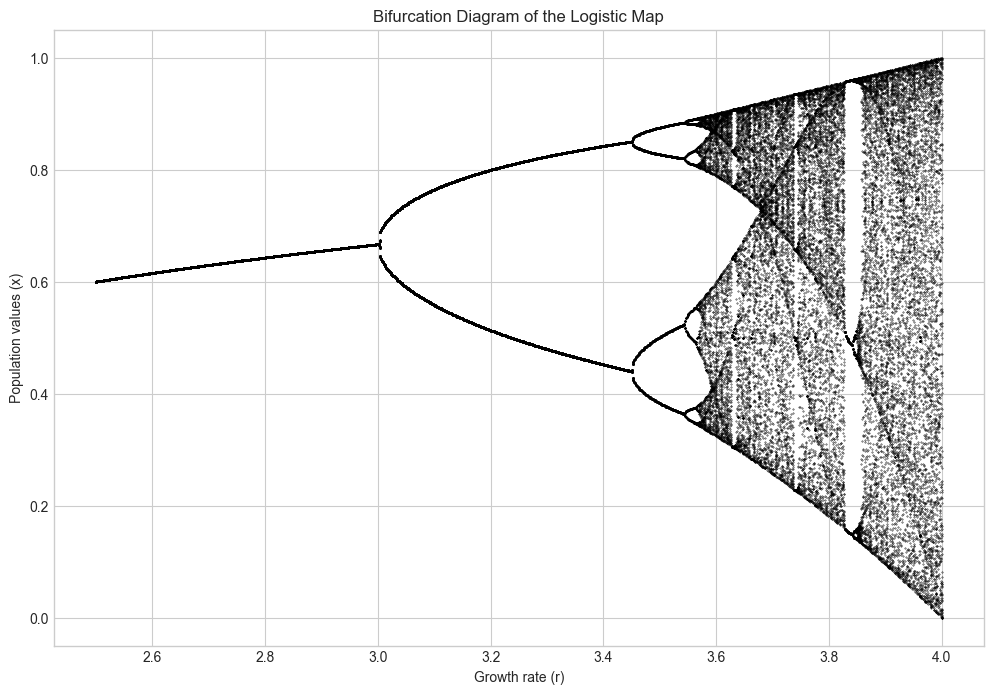

In [16]:
def bifurcation_data(r_range, n_skip=500, n_points=100):
    """Generate data for a bifurcation diagram of the logistic map.
    
    Parameters:
    -----------
    r_range : array-like
        Range of r values to use
    n_skip : int
        Number of initial iterations to skip (transient)
    n_points : int
        Number of points to plot for each r value
        
    Returns:
    --------
    r_values : array
        Repeated r values for plotting
    x_values : array
        Corresponding x values after transient behavior
    """
    # TODO: Implement this function to generate bifurcation diagram data
    # Hint: For each r value, generate a sequence, drop the initial n_skip values,
    # and keep the next n_points values
    
    # Your code here
    
    x_values = []
    r_values = []

    x = 0.5 # Initial value
    for r in r_range:
        sequence = []
        for _ in range (n_skip + n_points):
            x = r * x * (1 - x) # Logistic map equation
            sequence.append(x)

        # Skip the first n_skip values and keep the next n_points values
        x_values.extend(sequence[n_skip:])
        r_values.extend([r] * n_points)
    return r_values, x_values

# Use this code to plot the bifurcation diagram
r_range = np.linspace(2.5, 4, 1000)
r_vals, x_vals = bifurcation_data(r_range)

plt.figure(figsize=(12, 8))
plt.scatter(r_vals, x_vals, s=0.1, c='black')
plt.xlabel('Growth rate (r)')
plt.ylabel('Population values (x)')
plt.title('Bifurcation Diagram of the Logistic Map')
plt.show()

## Exercise 3: Measuring Complexity in Real Systems

In this exercise, we'll explore a simple model of an ecosystem (predator-prey dynamics) to see how complexity emerges from simple rules. The Lotka-Volterra equations are a classic model of predator-prey interactions:

$$\frac{dx}{dt} = \alpha x - \beta xy$$
$$\frac{dy}{dt} = \delta xy - \gamma y$$

where:
- $x$ is the prey population
- $y$ is the predator population
- $\alpha$ is the growth rate of prey
- $\beta$ is the rate at which predators kill prey
- $\delta$ is the rate at which predators increase by consuming prey
- $\gamma$ is the death rate of predators

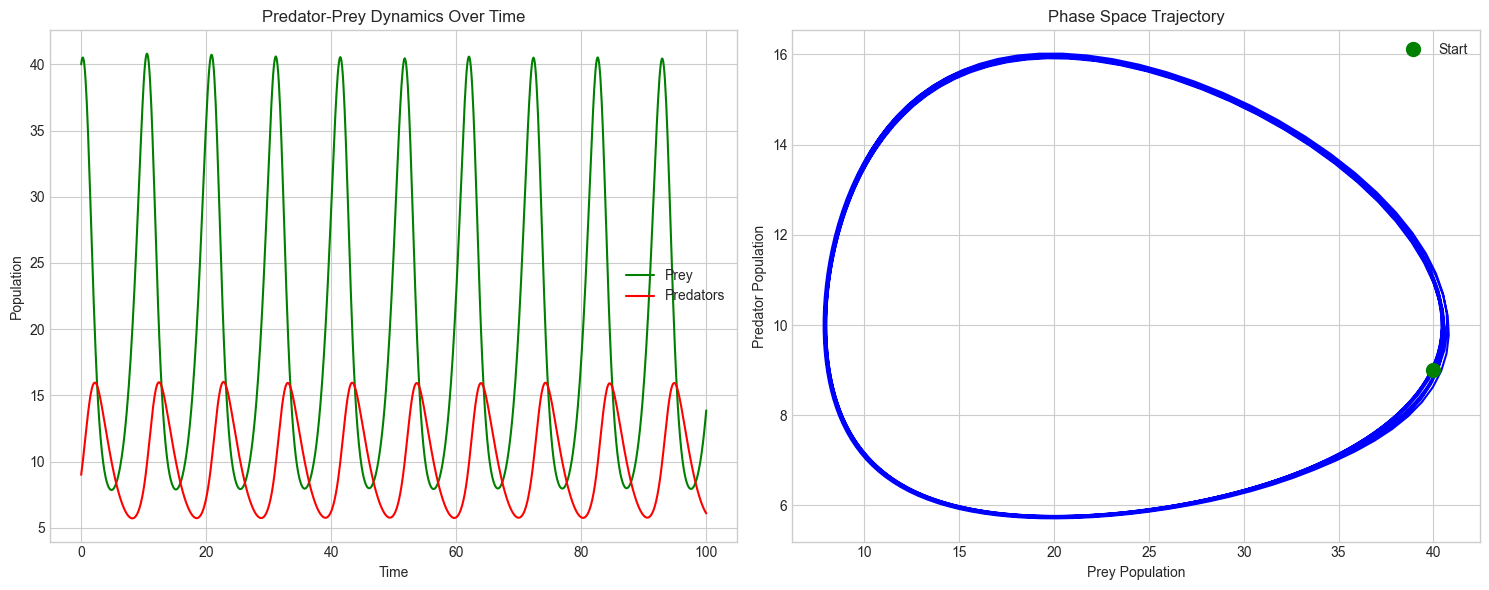

In [6]:
def lotka_volterra(t, z, alpha, beta, delta, gamma):
    """Lotka-Volterra predator-prey model."""
    x, y = z
    dx_dt = alpha * x - beta * x * y
    dy_dt = delta * x * y - gamma * y
    return [dx_dt, dy_dt]

# Parameters
alpha = 1.0  # Prey growth rate
beta = 0.1   # Predation rate
delta = 0.02 # Predator growth rate per prey consumed
gamma = 0.4  # Predator death rate

# Initial conditions
x0 = 40  # Initial prey population
y0 = 9   # Initial predator population

# Time points
t_span = (0, 100)
t = np.linspace(t_span[0], t_span[1], 1000)

# Solve the differential equations
solution = solve_ivp(
    lambda t, z: lotka_volterra(t, z, alpha, beta, delta, gamma),
    t_span, [x0, y0], t_eval=t, method='RK45'
)

# Extract the results
prey = solution.y[0]
predators = solution.y[1]
time = solution.t

# Plot the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Time series plot
ax1.plot(time, prey, 'g-', label='Prey')
ax1.plot(time, predators, 'r-', label='Predators')
ax1.set_xlabel('Time')
ax1.set_ylabel('Population')
ax1.set_title('Predator-Prey Dynamics Over Time')
ax1.legend()

# Phase space plot
ax2.plot(prey, predators, 'b-')
ax2.set_xlabel('Prey Population')
ax2.set_ylabel('Predator Population')
ax2.set_title('Phase Space Trajectory')
ax2.plot(prey[0], predators[0], 'go', markersize=10, label='Start')
ax2.legend()

plt.tight_layout()
plt.show()

Variable analysis

In [36]:
!pip install ipywidgets


[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: C:\Users\kekoi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from ipywidgets import interact, FloatSlider

def lotka_volterra(t, z, alpha, beta, delta, gamma):
    x, y = z
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return [dxdt, dydt]

def simulate_and_plot(alpha=1.0, beta=0.1, delta=0.02, gamma=0.4):
    # Initial conditions
    x0, y0 = 40, 9
    t_span = (0, 50)
    t = np.linspace(t_span[0], t_span[1], 1000)

    # Solve system
    sol = solve_ivp(
        lambda t, z: lotka_volterra(t, z, alpha, beta, delta, gamma),
        t_span, [x0, y0], t_eval=t, method='RK45'
    )

    x, y = sol.y
    time = sol.t

    # Equilibrium point
    x_eq = gamma / delta
    y_eq = alpha / beta

    # Plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Time Series
    ax1.plot(time, x, label='Prey (x)', color='green')
    ax1.plot(time, y, label='Predator (y)', color='red')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Population')
    ax1.set_title('Time Evolution')
    ax1.legend()
    ax1.grid(True)

    # Phase Space with Nullclines
    ax2.plot(x, y, color='purple', label='Trajectory')

    # Plot nullclines
    x_range = np.linspace(min(x)*0.9, max(x)*1.1, 500)
    y_range = np.linspace(min(y)*0.9, max(y)*1.1, 500)

    ax2.axhline(y_eq, color='green', linestyle='--', label='Prey nullcline (y = α/β)')
    ax2.axvline(x_eq, color='red', linestyle='--', label='Predator nullcline (x = γ/δ)')

    # Equilibrium point
    ax2.plot(x_eq, y_eq, 'ko', markersize=8, label='Equilibrium')

    ax2.set_xlabel('Prey (x)')
    ax2.set_ylabel('Predator (y)')
    ax2.set_title('Phase Space with Nullclines')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

# Interactive widget
interact(
    simulate_and_plot,
    alpha=FloatSlider(value=1.0, min=0.1, max=2.0, step=0.05, description='α (Prey growth)'),
    beta=FloatSlider(value=0.1, min=0.01, max=0.5, step=0.01, description='β (Predation)'),
    delta=FloatSlider(value=0.02, min=0.001, max=0.1, step=0.001, description='δ (Predator growth)'),
    gamma=FloatSlider(value=0.4, min=0.1, max=1.0, step=0.05, description='γ (Predator death)')
)


interactive(children=(FloatSlider(value=1.0, description='α (Prey growth)', max=2.0, min=0.1, step=0.05), Floa…

<function __main__.simulate_and_plot(alpha=1.0, beta=0.1, delta=0.02, gamma=0.4)>

Adding a third player into the scene a super predator. 

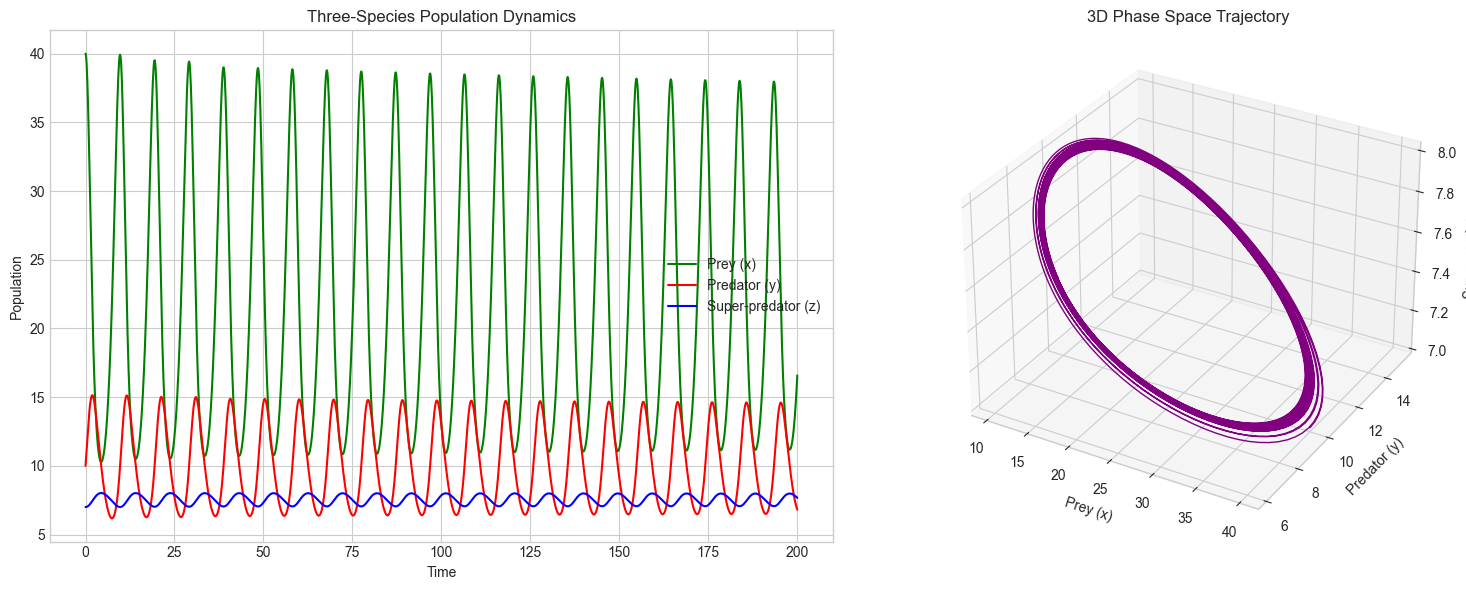

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def three_species_model(t, z, alpha, beta, delta, gamma, epsilon, zeta, eta):
    x, y, z_ = z  # Unpack populations
    dx_dt = alpha * x - beta * x * y
    dy_dt = delta * x * y - gamma * y - epsilon * y * z_
    dz_dt = zeta * y * z_ - eta * z_
    return [dx_dt, dy_dt, dz_dt]

# Parameters
alpha = 1.0     # Prey growth
beta = 0.1      # Prey->Predator predation
delta = 0.02    # Predator growth per prey
gamma = 0.4     # Predator death
epsilon = 0.005   # Less aggressive predation on y
zeta = 0.01       # More efficient conversion of y → z
eta = 0.1         # Lower death rate for z

# Initial populations
x0 = 40   # Prey
y0 = 10    # Predator
z0 = 7    # Super-predator

# Time span
t_span = (0, 200)
t = np.linspace(t_span[0], t_span[1], 2000)

# Solve the system
sol = solve_ivp(
    lambda t, z: three_species_model(t, z, alpha, beta, delta, gamma, epsilon, zeta, eta),
    t_span, [x0, y0, z0], t_eval=t, method='RK45'
)

x, y, z_ = sol.y
time = sol.t

# Plot: Time Series
fig = plt.figure(figsize=(16, 6))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(time, x, label='Prey (x)', color='green')
ax1.plot(time, y, label='Predator (y)', color='red')
ax1.plot(time, z_, label='Super-predator (z)', color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('Population')
ax1.set_title('Three-Species Population Dynamics')
ax1.legend()
ax1.grid(True)

# Plot: Phase Space
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot(x, y, z_, color='purple', lw=1)
ax2.set_xlabel('Prey (x)')
ax2.set_ylabel('Predator (y)')
ax2.set_zlabel('Super-predator (z)')
ax2.set_title('3D Phase Space Trajectory')

plt.tight_layout()
plt.show()


### Your Turn: Exploring Complexity through Parameter Changes

Now, explore how the complexity of the predator-prey system changes as you vary the parameters. This will help you understand how the nature of complexity can shift even in a relatively simple model.

**Tasks:**
1. Create a function that calculates a complexity measure for the predator-prey system (e.g., the average rate of change in population sizes)
2. Run simulations with different parameter sets and calculate the complexity measure for each
3. Create a visualization that shows how the complexity changes with different parameter values
4. Identify parameter regions where the system exhibits more complex behavior

In [ ]:
def calculate_complexity(prey, predators):
    """Calculate a measure of complexity for the predator-prey system.
    
    This is just one possible way to measure complexity. You can define your own!
    Here we use the standard deviation of the rate of change in both populations.
    """
    # TODO: Implement a complexity measure
    # Hint: You could use the variability in population sizes, frequency of oscillations,
    # or other measures that capture the system's behavior
    
    # Your code here
    
    return complexity_measure

# TODO: Run simulations with different parameters
# Example:
# alpha_values = np.linspace(0.5, 2.0, 10)
# results = []

# for alpha in alpha_values:
#     # Run simulation with this alpha value
#     # Calculate complexity
#     # Store results

# TODO: Create visualization
# plt.figure(figsize=(10, 6))
# plt.plot(...)
# plt.show()

## Summary

In this notebook, we've explored the nature of complexity through several exercises:

1. We used information entropy to quantify complexity and demonstrated how complexity often lies between complete order and complete randomness.

2. We examined the logistic map as a simple system that can exhibit complex behavior, including bifurcations and chaos, depending on a single parameter.

3. We modeled a predator-prey ecosystem to observe complexity emerging from simple interaction rules, and explored how parameter changes affect the system's behavior.

These exercises illustrate key aspects of complex systems:
- Simple rules can generate complex behavior
- Parameter changes can lead to qualitative shifts in behavior
- Complexity can be quantified using various measures
- Complex systems often exhibit patterns that are neither completely ordered nor completely random

In the next section, we'll explore emergence - another fundamental property of complex systems where collective behavior arises from simple individual interactions.